<a href="https://colab.research.google.com/github/Veeraprathap3740/Bharat_Intern/blob/main/CATS__Vs__DOGS__CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 246MB/s]
100% 1.06G/1.06G [00:04<00:00, 250MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.6010 - accuracy: 0.5967 - val_loss: 0.6298 - val_accuracy: 0.6734
Epoch 2/10
625/625 [==============================] - 65s 102ms/step - loss: 0.5920 - accuracy: 0.6901 - val_loss: 0.5414 - val_accuracy: 0.7378
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5161 - accuracy: 0.7494 - val_loss: 0.5986 - val_accuracy: 0.7122
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4481 - accuracy: 0.7883 - val_loss: 0.4722 - val_accuracy: 0.7786
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3877 - accuracy: 0.8262 - val_loss: 0.6707 - val_accuracy: 0.6918
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3394 - accuracy: 0.8528 - val_loss: 0.8215 - val_accuracy: 0.7204
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2710 - accuracy: 0.8857 - val_loss: 0.7580 - val_ac

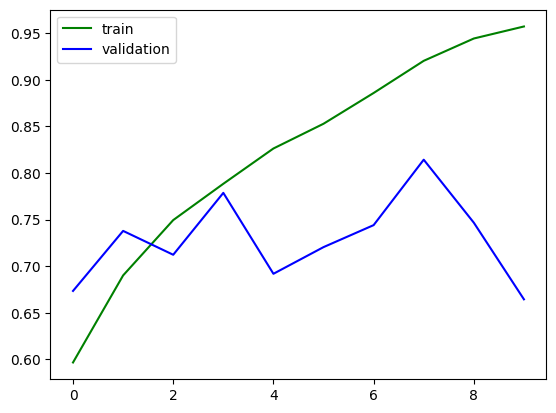

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

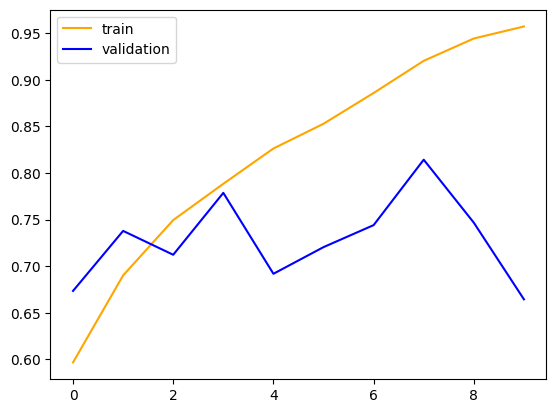

In [19]:
plt.plot(history.history['accuracy'],color='orange',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

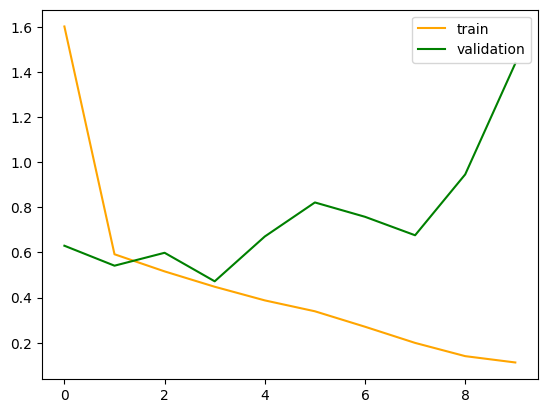

In [20]:
plt.plot(history.history['loss'],color='orange',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

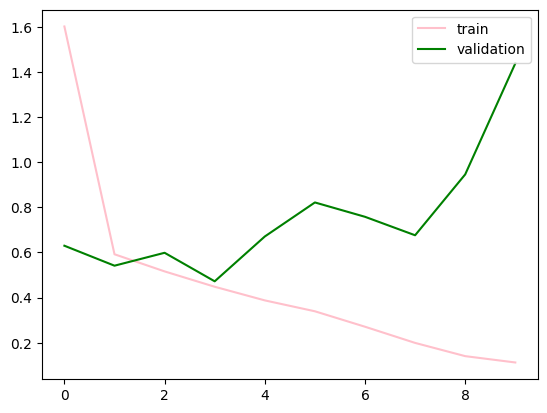

In [21]:
plt.plot(history.history['loss'],color='pink',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [22]:
# ways to reduce overfitting

# Add more data
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [23]:
import cv2

In [24]:
image_path = '/content/train/cats/cat.1000.jpg'
test_image = cv2.imread(image_path)

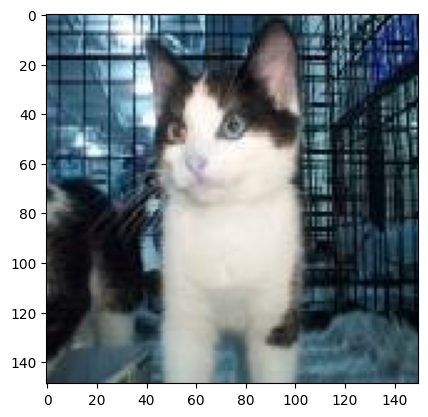

In [25]:
plt.imshow(test_image)
plt.show()

In [26]:
test_image.shape

(149, 150, 3)

In [27]:
test_image = cv2.resize(test_image,(256,256))

In [28]:
test_input = test_image.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 404ms/step


array([[0.]], dtype=float32)

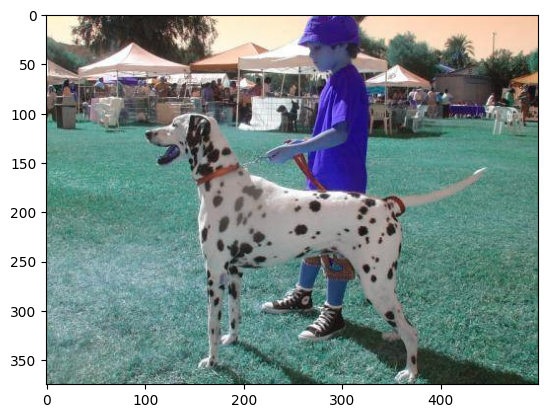

In [30]:
image_path = '/content/train/dogs/dog.10004.jpg'
test_image = cv2.imread(image_path)
plt.imshow(test_image)
plt.show()

In [31]:
test_image.shape

(375, 499, 3)

In [32]:
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

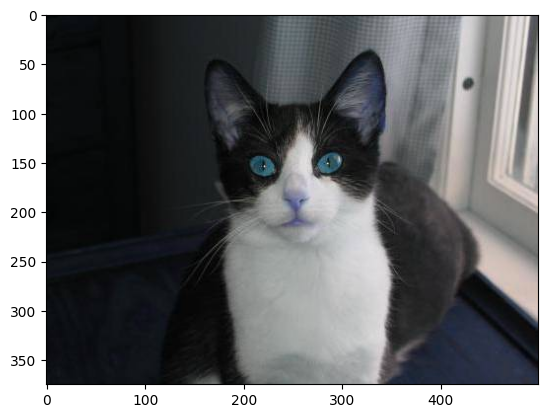

In [34]:
image_path = '/content/test/cats/cat.10333.jpg'
test_image = cv2.imread(image_path)
plt.imshow(test_image)
plt.show()

In [35]:
test_image.shape

(375, 499, 3)

In [36]:
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

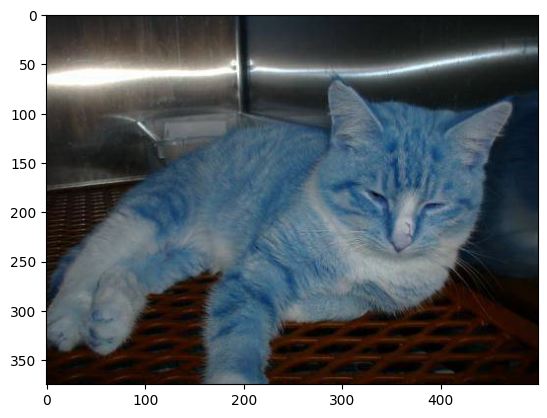

In [38]:
image_path = '/content/train/cats/cat.10111.jpg'
test_image = cv2.imread(image_path)
plt.imshow(test_image)
plt.show()

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

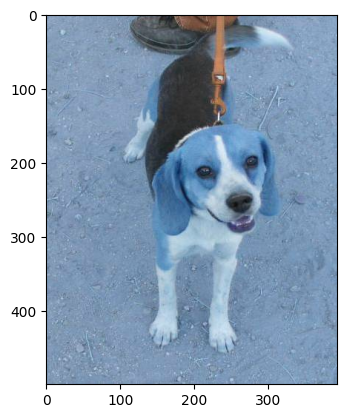

In [40]:
image_path = '/content/train/dogs/dog.10037.jpg'
test_image = cv2.imread(image_path)
plt.imshow(test_image)
plt.show()

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

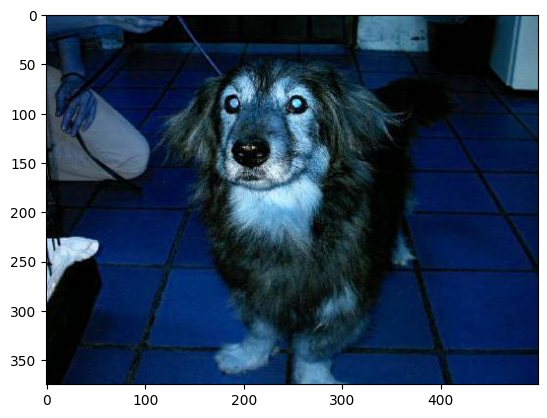

In [42]:
image_path = '/content/train/dogs/dog.10057.jpg'
test_image = cv2.imread(image_path)
plt.imshow(test_image)
plt.show()

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)